### importing Modules

In [1]:
import pandas as pd              #import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Loding The Dataset

In [2]:
df=pd.read_csv("C:/Users/soham/Downloads/avocado.csv/avocado.csv",index_col=0)
df # loading data from github 

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.info() # use info method to get an a general idea about our data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
df.isnull().sum() # there is no missing values

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Preprocessing the Dataset

<AxesSubplot:>

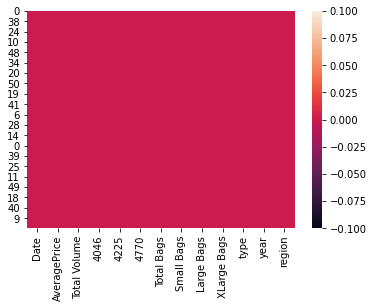

In [5]:
sns.heatmap(df.isnull()) # There is no missing values present in heatmap shown grapha.

In [6]:
df.dtypes # checking data types 

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df['XLarge Bags'].sample(5) 
# there is no direct relation between target variable so drop this columns because there is 0 values almost

28     3035.00
2         0.00
38        0.00
42    12664.89
25     3240.00
Name: XLarge Bags, dtype: float64

In [8]:
df.drop(['XLarge Bags'],axis=1,inplace=True)


### Exploratory Data analysis(EDA)

### Removing Outlier

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,2018.000000


AveragePrice       AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Total Volume    AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
4046             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
4225            AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
4770            AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
Total Bags         AxesSubplot(0.125,0.677439;0.133621x0.0920732)
Small Bags      AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
Large Bags       AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
year            AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
dtype: object

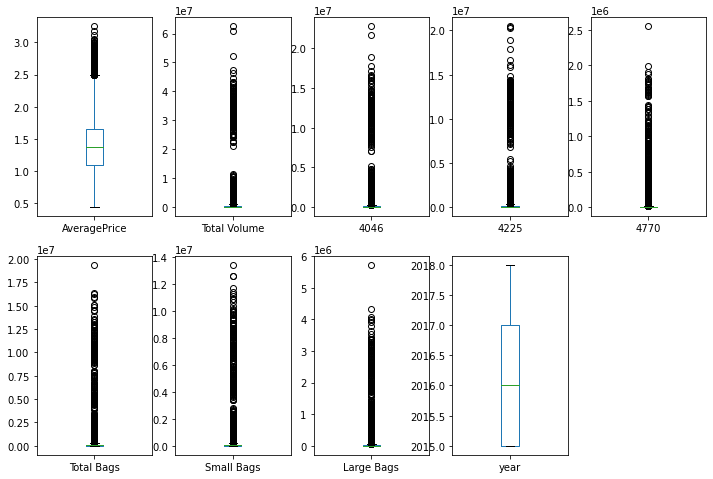

In [10]:
df.plot(kind='box',subplots=True,layout=(7,5),figsize=(12,30)) #checking Outlier in dataset some of columns present outlier

#some columns having high outlier so need to remove like 4770,total bags,Small bags,Large bags,4046,4225

{'whiskers': [<matplotlib.lines.Line2D at 0x20a48755c10>,
 'caps': [<matplotlib.lines.Line2D at 0x20a48761310>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a487558b0>],
 'medians': [<matplotlib.lines.Line2D at 0x20a487619d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a48761d30>],
 'means': []}

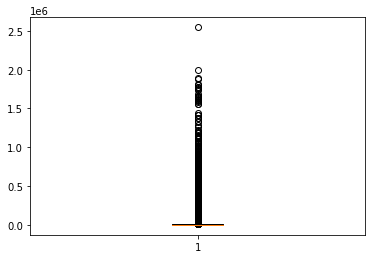

In [11]:
plt.boxplot(df['4770'])# having high outlier

In [12]:
#Removing OUtlier
from scipy.stats import zscore
z=np.abs(zscore(df['4770']))
z

array([0.21209136, 0.21199672, 0.21132513, ..., 0.20576554, 0.20577419,
       0.21045012])

In [13]:
#Removing OUtlier
from scipy.stats import zscore
z=np.abs(zscore(df['4046']))
z

array([0.23081597, 0.23110251, 0.23100731, ..., 0.2306933 , 0.2304279 ,
       0.22934712])

In [14]:
#Removing OUtlier
from scipy.stats import zscore
z=np.abs(zscore(df['4225']))
z

array([0.1999022 , 0.20805446, 0.1544779 , ..., 0.24309014, 0.24265143,
       0.24317042])

In [15]:
#Removing OUtlier
from scipy.stats import zscore
z=np.abs(zscore(df['Total Bags']))
z

array([0.23417028, 0.23335029, 0.23472951, ..., 0.2334633 , 0.23186585,
       0.23080663])

In [16]:
#Removing OUtlier
from scipy.stats import zscore
z=np.abs(zscore(df['Small Bags']))
z

array([0.2326465 , 0.23156838, 0.23339891, ..., 0.23164379, 0.22954271,
       0.22811058])

In [17]:
#Removing OUtlier
from scipy.stats import zscore
z=np.abs(zscore(df['year']))
z

array([1.22128204, 1.22128204, 1.22128204, ..., 1.97050371, 1.97050371,
       1.97050371])

Removing Skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabe

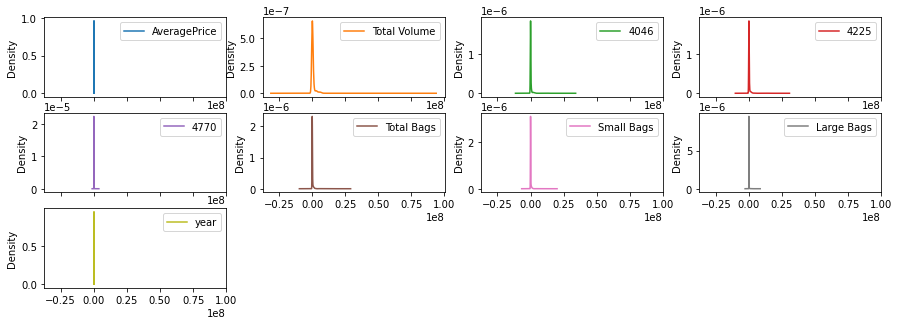

In [18]:
#to check Distribution of skewness
df.plot(kind='kde',subplots=True,layout=(7,4),figsize=(15,12))

In [19]:
from scipy.stats import boxcox # Remove Skewness from some columns using o= Log Trasformation method
df['Total Volume']=boxcox(df['Total Volume'],0)

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

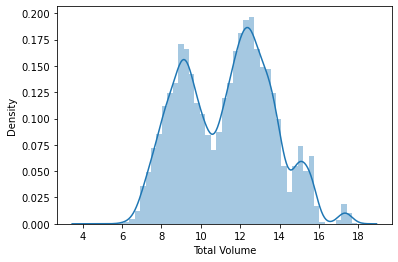

In [20]:
sns.distplot(df['Total Volume'])

In [21]:
df['Date']=pd.to_datetime(df['Date']) # we create additional columns like Date, day for futher data process. 
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

Text(0.5, 1.0, 'Average Price')

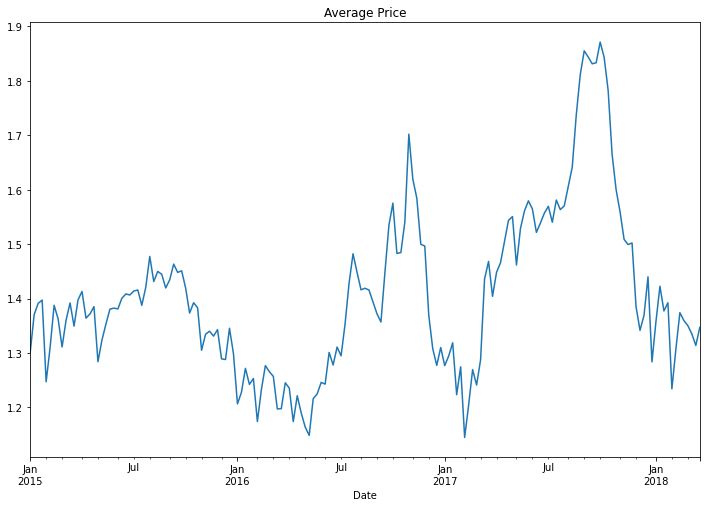

In [22]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [23]:
df.drop(columns=['Date'],inplace=True)

<AxesSubplot:>

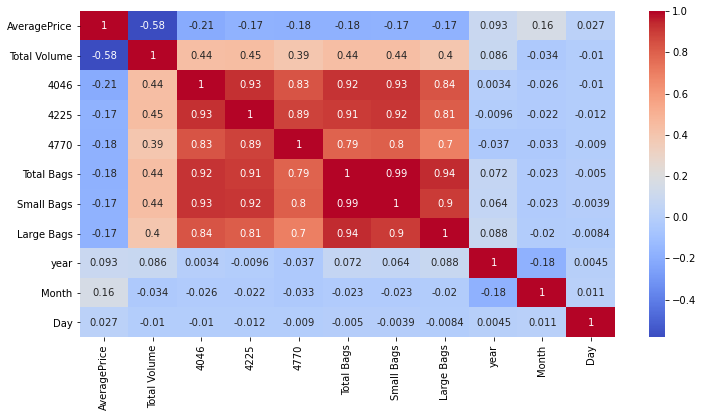

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


All features are not corroleted with the average price columnss insted most of them are correlated with each other.
like 4046 same with 4225 so drop that columns

In [25]:
df.drop(columns='4225',axis=1,inplace=True)

In [26]:
df['region'].nunique()

54

In [27]:
df['type'].nunique()

2

In [28]:
#df1=pd.get_dummies(df.drop(['region'],axis=1),drop_first=True)

AveragePrice       AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Total Volume    AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
4046             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
4770            AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Total Bags      AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
Small Bags         AxesSubplot(0.125,0.677439;0.133621x0.0920732)
Large Bags      AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
year             AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
Month           AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
Day             AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
dtype: object

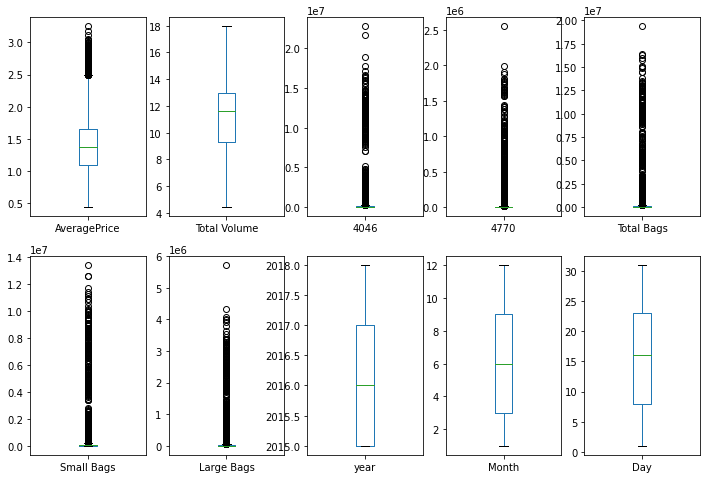

In [29]:
df.plot(kind='box',subplots=True,layout=(7,5),figsize=(12,30)) #checking Outlier in dataset some of columns present outlier

In [30]:
df.drop(columns='Small Bags',axis=1,inplace=True)

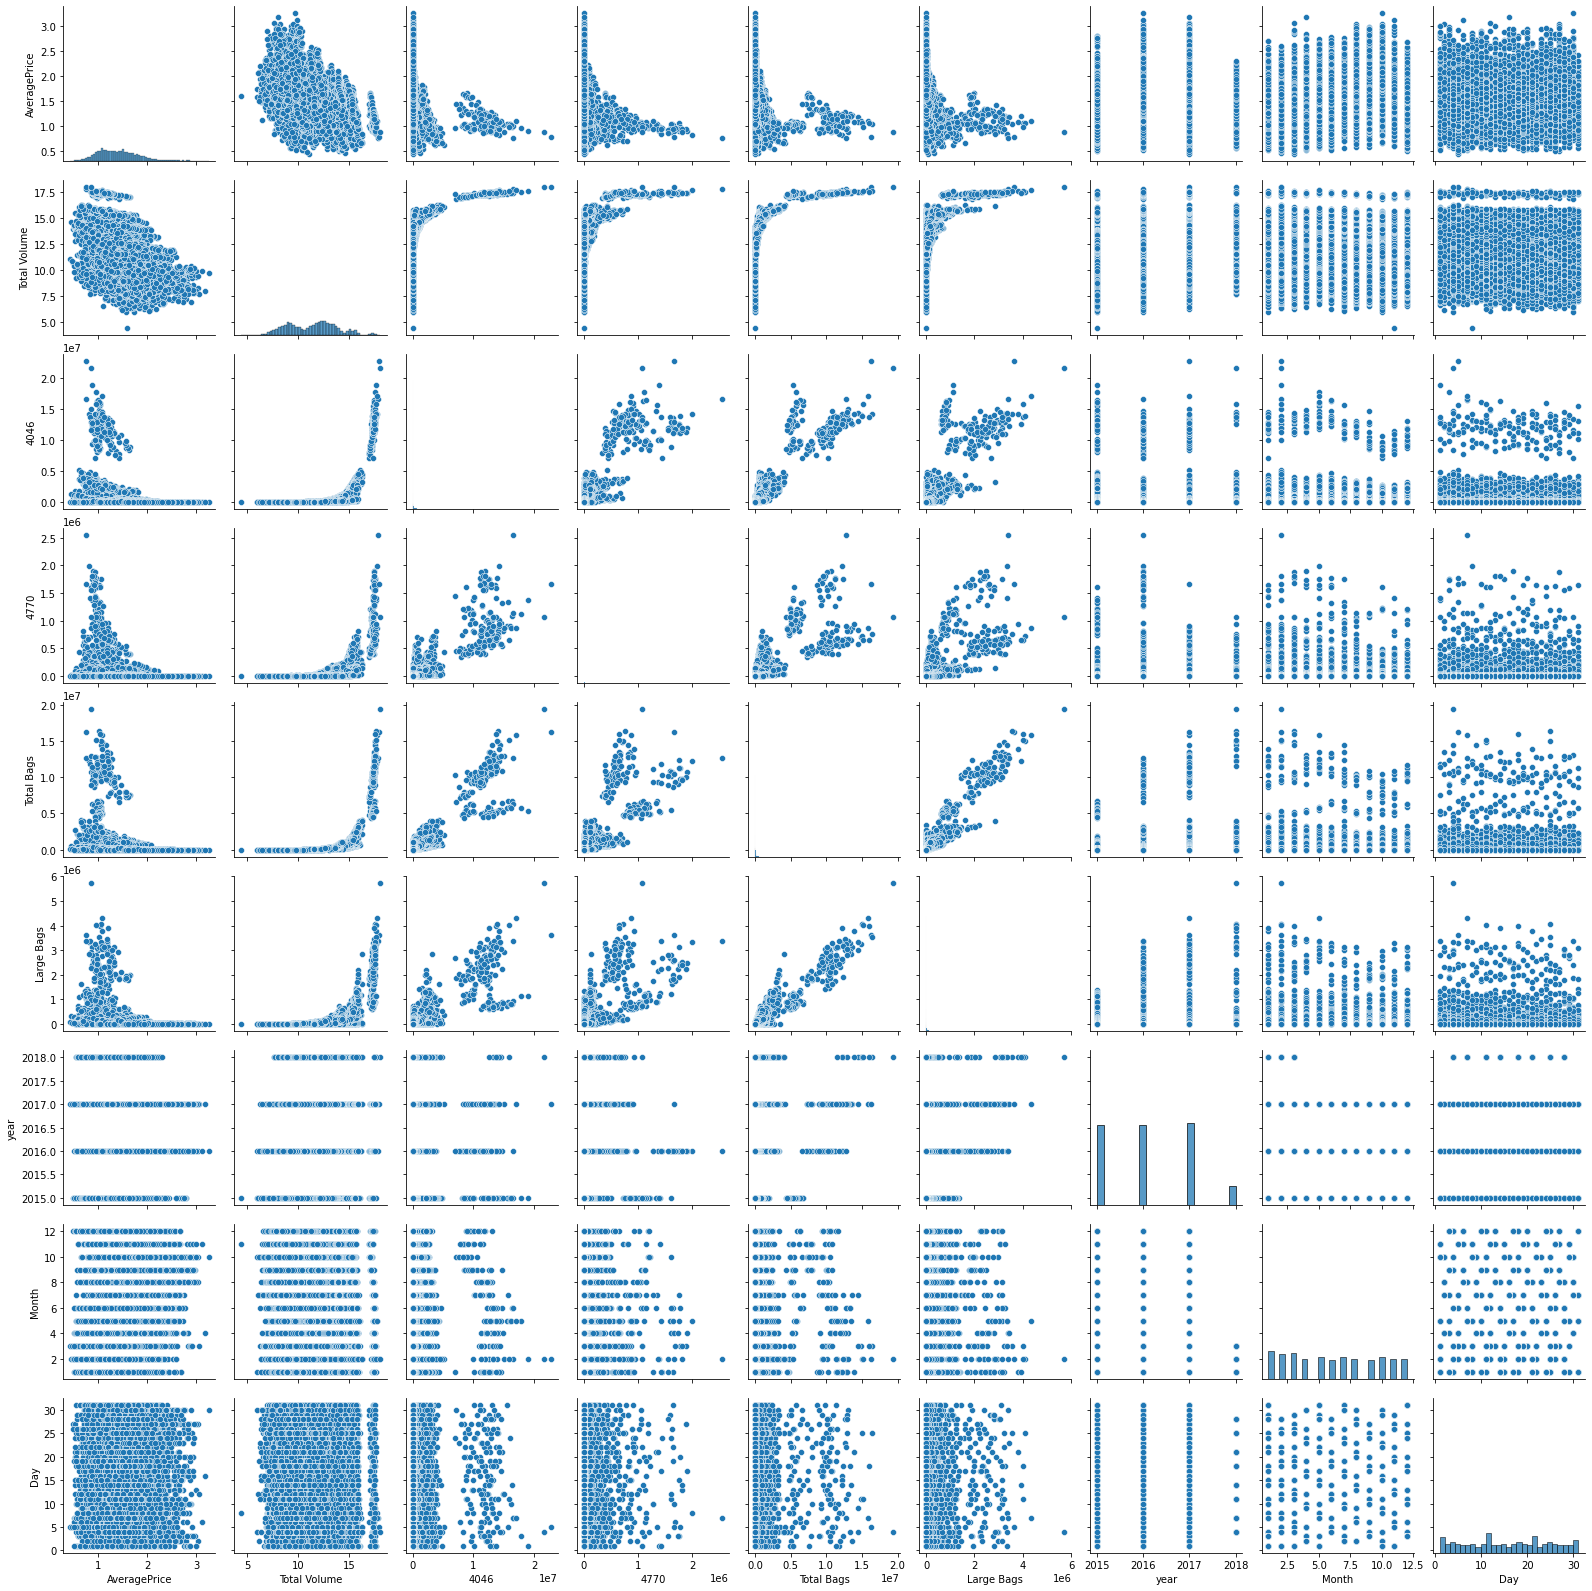

In [31]:
sns.pairplot(df) # given all dataset info in detels 

### Label Encoder:
            by using label encoder we convert some string data into binary int ....BusinessTravel',Attrition,Department this columns we convert into numric data.

In [32]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['region']=lb.fit_transform(df['region'])
print(df['region'])

0      0
1      0
2      0
3      0
4      0
      ..
7     53
8     53
9     53
10    53
11    53
Name: region, Length: 18249, dtype: int32


In [33]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['type']=lb.fit_transform(df['type'])
print(df['type'])

0     0
1     0
2     0
3     0
4     0
     ..
7     1
8     1
9     1
10    1
11    1
Name: type, Length: 18249, dtype: int32


### Train Test Split
     separating the columns into features and target:

In [34]:
y=df['region']
x=df.drop(columns=['region'],axis=1)

In [35]:
#from sklearn.preprocessing import MinMaxScaler #to equilise all dataset for higher accuracy
#mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### Find the  beast Random_state use here (currently we are moving shead with Random_state 12)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=12)

In [37]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(18249, 10) (12226, 10) (6023, 10)
(18249,) (12226,) (6023,)


In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
lr.score(x_train,y_train) #we got Model learning score is very best which is best for further Prediction

0.07800163060688503

In [40]:
pred=lr.predict(x_test)

In [41]:
print(r2_score(y_test,pred))

0.07700593484732698


In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Regularization: 
### GridSearchCV
### Cross Validation Score

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso

import warnings
warnings.filterwarnings('ignore')

In [44]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [45]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.07687828292898413

In [46]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.28598351678951633

In [47]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))} #For Ridge 
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [48]:
rd=Ridge(alpha=0.01,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rds=r2_score(y_test,pred_rd)
rds

0.07700589987605233

In [49]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.28701842418015766

### KNeighborsRegressor : Model,GridSearchCV,Cross Validation Score

### Ensemble Method:Bagging(Parallel)
   ### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("Cross val Score :",rfc*100)

R2 Score : 71.67670118642747
Cross val Score : -85.51109265553768


we are getting model accuracy and cross validation nearby good in other model so our model is performing extremely well.

### Saving Model

In [51]:
import pickle 
filename='Avacado.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion:

In [52]:
loaded_model=pickle.load(open('Avacado.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7167670118642747


In [53]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predict','Original'])

In [54]:
conclusion # we got aproximatly best result 

,0,1,2,3,4,5,6,7,8,9,...,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022
Predict,28.31,29.97,14.81,7.96,20.56,13.21,15.0,30.34,38.29,38.77,...,20.91,28.0,10.2,30.75,30.3,15.52,20.58,25.5,34.76,29.09
Original,28.31,29.97,14.81,7.96,20.56,13.21,15.0,30.34,38.29,38.77,...,20.91,28.0,10.2,30.75,30.3,15.52,20.58,25.5,34.76,29.09


### Task 2 know consider Average price as target veriable and using classification algoritham we predict data.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
#df['AveragePrice']=df['AveragePrice'].astype(float)#(lambda x:0 if x <=1.5 else 1)

In [57]:
df['AveragePrice']=df['AveragePrice'].apply(lambda x:0 if x <=1 else 1)

In [58]:
df['AveragePrice'].value_counts()

1    15286
0     2963
Name: AveragePrice, dtype: int64

In [59]:
df['AveragePrice'].unique()

array([1, 0], dtype=int64)

In [60]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['region']=lb.fit_transform(df['region'])
print(df['region'])

0      0
1      0
2      0
3      0
4      0
      ..
7     53
8     53
9     53
10    53
11    53
Name: region, Length: 18249, dtype: int64


### Train Test Split
     separating the columns into features and target:

In [61]:
x=df.drop(columns='AveragePrice',axis=1)
y=df['AveragePrice']

### Find the  best Random_state use here (currently we are moving head with Random_state 12)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=12)

In [63]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(18249, 10) (12226, 10) (6023, 10)
(18249,) (12226,) (6023,)


### GridSearchCV ,Cross Validation ,Model Develop

In [64]:
parameters={'alpha':[1.0],'fit_prior':['bool']}
mnb=MultinomialNB()
clf=GridSearchCV(mnb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1.0, 'fit_prior': 'bool'}


In [65]:
# MultinomialNB 1
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.8145442470529637
[[ 527  476]
 [ 641 4379]]
              precision    recall  f1-score   support

           0       0.45      0.53      0.49      1003
           1       0.90      0.87      0.89      5020

    accuracy                           0.81      6023
   macro avg       0.68      0.70      0.69      6023
weighted avg       0.83      0.81      0.82      6023



### KFold Cross Validation

In [66]:
from sklearn.model_selection import KFold

score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.61013699 0.65589041 0.85671233 0.88438356 0.8695533 ]
0.7753353179891657
0.11742941752221417


### Hyperparameter Tuning:GRidSearch CV

In [67]:
# Support Vector classifier
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8605346173003486
[[ 224  779]
 [  61 4959]]
              precision    recall  f1-score   support

           0       0.79      0.22      0.35      1003
           1       0.86      0.99      0.92      5020

    accuracy                           0.86      6023
   macro avg       0.83      0.61      0.63      6023
weighted avg       0.85      0.86      0.83      6023



Hold OUt

In [68]:
cv_score=cross_val_score(svc,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8379101499003292

### Hyperparameter Tuning:GRidSearch CV

In [69]:
# KNeighbors classifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.885605180142786
[[ 492  511]
 [ 178 4842]]
              precision    recall  f1-score   support

           0       0.73      0.49      0.59      1003
           1       0.90      0.96      0.93      5020

    accuracy                           0.89      6023
   macro avg       0.82      0.73      0.76      6023
weighted avg       0.88      0.89      0.88      6023



In [70]:
from sklearn.model_selection import KFold

score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.61013699 0.65589041 0.85671233 0.88438356 0.8695533 ]
0.7753353179891657
0.11742941752221417


In [71]:
# Support vector Machine Kernal=ker,rbf,poly
def SVMkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [72]:
SVMkernel('rbf')

0.8605346173003486
[[ 224  779]
 [  61 4959]]
              precision    recall  f1-score   support

           0       0.79      0.22      0.35      1003
           1       0.86      0.99      0.92      5020

    accuracy                           0.86      6023
   macro avg       0.83      0.61      0.63      6023
weighted avg       0.85      0.86      0.83      6023



In [73]:
SVMkernel('poly')

0.8349659638054125
[[  14  989]
 [   5 5015]]
              precision    recall  f1-score   support

           0       0.74      0.01      0.03      1003
           1       0.84      1.00      0.91      5020

    accuracy                           0.83      6023
   macro avg       0.79      0.51      0.47      6023
weighted avg       0.82      0.83      0.76      6023



### Hyperparameter Tuning:GRidSearch CV

In [74]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)                               #DesicisionTreeClassifier having highest score with cross validation 
best_result=gd_sr.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'gini'}
0.4809780574148669
0.48


In [75]:
# Decision Tree classifier 
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9073551386352317
[[ 699  304]
 [ 254 4766]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      1003
           1       0.94      0.95      0.94      5020

    accuracy                           0.91      6023
   macro avg       0.84      0.82      0.83      6023
weighted avg       0.91      0.91      0.91      6023



In [81]:
from sklearn.model_selection import KFold

score=cross_val_score(dtc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.40164384 0.11945205 0.59068493 0.53534247 0.77205479 0.85424658
 0.83890411 0.82027397 0.8290411  0.81414474]
0.6575788572458544
0.23228073030454366


we are getting model accuracy and cross validation nearby good in other model so our model is performing extremely well.

### Saving Best Model

In [76]:
import pickle 
filename='HRAnalytics.pkl'
pickle.dump(mnb,open(filename,'wb'))

### Conclusion:

In [77]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dtc.predict(x_test))
df=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
6018,1,1
6019,0,0
6020,1,1
6021,1,1
